##### Machine Learning Course Project
# Preprocessing
##### Darryl Abraham, Riccardo Paciello

### Importing Libraries

In [324]:
import pandas as pd
import numpy as np
from functools import reduce
import operator

import sns
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from scipy.stats import chi2_contingency, fisher_exact
from sklearn.preprocessing import LabelEncoder
from scipy.stats import spearmanr
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.feature_selection import mutual_info_classif
import prince
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

### Loading the Data

In [325]:
df = pd.read_csv('./data/cup98LRN.txt', sep = ',', chunksize=10000, low_memory=False)
df = pd.concat(df, axis='rows')
df.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


In [326]:
def get_feature_types(df):
    feature_types = {}
    for col in df.columns:
        feature_types[col] = df[col].dtype
    return feature_types
feature_types = get_feature_types(df)

In [327]:
df.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


In [328]:
df.describe()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
count,95412.000000,95412.000000,95412.000000,71747.000000,12386.000000,74126.000000,50680.000000,95412.000000,42558.000000,42558.000000,...,95412.000000,85439.000000,85439.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95280.000000
mean,9141.363256,54.223117,2723.602933,61.611649,1.527773,3.886248,5.345699,3.321438,0.152075,0.059166,...,9135.651648,9151.022917,8.093739,13.347786,95778.176959,0.050759,0.793073,0.500618,1.910053,31.533711
std,343.454752,953.844476,2132.241295,16.664199,0.806861,1.854960,2.742490,9.306899,0.470023,0.262078,...,320.394019,294.257260,8.213242,10.769997,55284.596094,0.219506,4.429725,0.500002,1.072749,18.764614
min,8306.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7211.000000,0.000000,1.285714,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,8801.000000,0.000000,201.000000,48.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,...,8810.000000,8903.000000,4.000000,8.384615,47910.750000,0.000000,0.000000,0.000000,1.000000,15.000000
50%,9201.000000,1.000000,2610.000000,62.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,...,9201.000000,9204.000000,6.000000,11.636364,95681.500000,0.000000,0.000000,1.000000,2.000000,32.000000
75%,9501.000000,2.000000,4601.000000,75.000000,2.000000,5.000000,8.000000,3.000000,0.000000,0.000000,...,9409.000000,9409.000000,11.000000,15.477955,143643.500000,0.000000,0.000000,1.000000,3.000000,49.000000
max,9701.000000,72002.000000,9710.000000,98.000000,7.000000,7.000000,9.000000,241.000000,6.000000,4.000000,...,9603.000000,9702.000000,1088.000000,1000.000000,191779.000000,1.000000,200.000000,1.000000,4.000000,62.000000


In [329]:
id = ['CONTROLN']
num_feats = ['ODATEDW', 'DOB', 'AGE', 'NUMCHLD', 'INCOME', 'HIT', 'MBCRAFT', "MBGARDEN", "MBBOOKS", "MBCOLECT", "MAGFAML", "MAGFEM", "MAGMALE", "PUBGARDN", "PUBCULIN", "PUBHLTH", "PUBDOITY", "PUBNEWFN", "PUBPHOTO", "PUBOPP", 'MALEMILI', 'MALEVET', 'VIETVETS', 'WWIIVETS', 'LOCALGOV', 'STATEGOV', 'FEDGOV', 'POP901', 'POP902', 'POP903', 'POP90C1', 'POP90C2', 'POP90C3', 'POP90C4', 'POP90C5', 'ETH1', 'ETH2', 'ETH3', 'ETH4', 'ETH5', 'ETH6', 'ETH7', 'ETH8', 'ETH9', 'ETH10', 'ETH11', 'ETH12', 'ETH13', 'ETH14', 'ETH15', 'ETH16', 'AGE901', 'AGE902', 'AGE903', 'AGE904', 'AGE905', 'AGE906', 'AGE907', 'CHIL1', 'CHIL2', 'CHIL3', 'AGEC1', 'AGEC2', 'AGEC3', 'AGEC4', 'AGEC5', 'AGEC6', 'AGEC7', 'CHILC1', 'CHILC2', 'CHILC3', 'CHILC4', 'CHILC5', "HHAGE1", "HHAGE2", "HHAGE3", "HHN1", "HHN2", "HHN3", "HHN4", "HHN5", "HHN6", "MARR1", "MARR2", "MARR3", "MARR4", "HHP1", "HHP2", "DW1", "DW2", "DW3", "DW4", "DW5", "DW6", "DW7", "DW8", "DW9", "HV1", "HV2", "HV3", "HV4", "HU1", "HU2", "HU3", "HU4", "HU5", "HHD1", "HHD2", "HHD3", "HHD4", "HHD5", "HHD6", "HHD7", "HHD8", "HHD9", "HHD10", "HHD11", "HHD12", "ETHC1", "ETHC2", "ETHC3", "ETHC4","ETHC5", "ETHC6", "HVP1", "HVP2", "HVP3", "HVP4", "HVP5", "HVP6", "HUR1", "HUR2", "RHP1", "RHP2", "RHP3", "RHP4", "HUPA1", "HUPA2", "HUPA3", "HUPA4", "HUPA5", "HUPA6", "HUPA7", "RP1", "RP2", "RP3", "RP4", "IC1", "IC2", "IC3", "IC4", "IC5", "IC6", "IC7", "IC8", "IC9", "IC10", "IC11", "IC12", "IC13", "IC14", "IC15", "IC16", "IC17", "IC18", "IC19", "IC20", "IC21", "IC22", "IC23", "HHAS1", "HHAS2", "HHAS3", "HHAS4", "MC1", "MC2", "MC3", "TPE1", "TPE2", "TPE3", "TPE4", "TPE5", "TPE6", "TPE7", "TPE8", "TPE9", "PEC1", "PEC2", "TPE10", "TPE11", "TPE12", "TPE13", "LFC1", "LFC2", "LFC3", "LFC4", "LFC5", "LFC6", "LFC7", "LFC8", "LFC9", "LFC10", "OCC1", "OCC2", "OCC3", "OCC4", "OCC5", "OCC6", "OCC7", "OCC8", "OCC9", "OCC10", "OCC11", "OCC12", "OCC13", "EIC1", "EIC2", "EIC3", "EIC4", "EIC5", "EIC6", "EIC7", "EIC8", "EIC9", "EIC10", "EIC11", "EIC12", "EIC13", "EIC14", "EIC15", "EIC16", "OEDC1", "OEDC2", "OEDC3", "OEDC4", "OEDC5", "OEDC6", "OEDC7", "EC1", "EC2", "EC3", "EC4", "EC5", "EC6", "EC7", "EC8", "SEC1", "SEC2", "SEC3", "SEC4", "SEC5", "AFC1", "AFC2", "AFC3", "AFC4", "AFC5", "AFC6", "VC1", "VC2", "VC3", "VC4", "ANC1", "ANC2", "ANC3", "ANC4", "ANC5", "ANC6", "ANC7", "ANC8", "ANC9", "ANC10", "ANC11", "ANC12", "ANC13", "ANC14", "ANC15", "POBC1", "POBC2", "LSC1", "LSC2", "LSC3", "LSC4", "VOC1", "VOC2", "VOC3", "HC1", "HC2", "HC3", "HC4", "HC5", "HC6", "HC7", "HC8", "HC9", "HC10", "HC11", "HC12", "HC13", "HC14", "HC15", "HC16", "HC17", "HC18", "HC19", "HC20", "HC21", "MHUC1", "MHUC2", "AC1", "AC2", 'CARDPROM', 'NUMPROM', 'CARDPM12', 'NUMPRM12', "RAMNT_3", "RAMNT_4", "RAMNT_5", "RAMNT_6", "RAMNT_7", "RAMNT_8", "RAMNT_9", "RAMNT_10", "RAMNT_11", "RAMNT_12", "RAMNT_13", "RAMNT_14", "RAMNT_15", "RAMNT_16", "RAMNT_17", "RAMNT_18", "RAMNT_19", "RAMNT_20", "RAMNT_21", "RAMNT_22", "RAMNT_23", "RAMNT_24", "RAMNTALL", "NGIFTALL", "CARDGIFT", "MINRAMNT", "MINRDATE", "MAXRAMNT", "MAXRDATE", "LASTGIFT", "LASTDATE", "FISTDATE", "NEXTDATE", "TIMELAG", "AVGGIFT", "ADATE_2", "ADATE_3", "ADATE_4", "ADATE_5", "ADATE_6", "ADATE_7", "ADATE_8", "ADATE_9", "ADATE_10", "ADATE_11", "ADATE_12", "ADATE_13", "ADATE_14", "ADATE_15", "ADATE_16", "ADATE_17", "ADATE_18", "ADATE_19", "ADATE_20", "ADATE_21", "ADATE_22", "ADATE_23", "ADATE_24"]
cat_feats = ['OSOURCE', 'TCODE', 'STATE', 'ZIP', 'MAILCODE', 'PVASTATE', 'NOEXCH', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'MDMAUD', 'DOMAIN', 'CLUSTER', 'AGEFLAG', 'HOMEOWNR', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'GENDER', 'WEALTH1', 'DATASRCE', 'SOLP3', 'SOLIH', 'MAJOR', 'WEALTH2', 'GEOCODE', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES', 'LIFESRC', 'PEPSTRFL', "MSA", "ADI", "DMA", "RFA_2", "RFA_3", "RFA_4", "RFA_5", "RFA_6", "RFA_7", "RFA_8", "RFA_9", "RFA_10", "RFA_11", "RFA_12", "RFA_13", "RFA_14", "RFA_15", "RFA_16", "RFA_17", "RFA_18", "RFA_19", "RFA_20", "RFA_21", "RFA_22", "RFA_23", "RFA_24", 'MAXADATE', 'HPHONE_D', "RFA_2R", "RFA_2F", "RFA_2A", "MDMAUD_R", "MDMAUD_F", "MDMAUD_A", 'CLUSTER2', 'GEOCODE2']
ordinal_feats = ['DOMAIN', 'WEALTH1', 'SOLP3', 'SOLIH', 'WEALTH2', "RFA_2", "RFA_3", "RFA_4", "RFA_5", "RFA_6", "RFA_7", "RFA_8", "RFA_9", "RFA_10", "RFA_11", "RFA_12", "RFA_13", "RFA_14", "RFA_15", "RFA_16", "RFA_17", "RFA_18", "RFA_19", "RFA_20", "RFA_21", "RFA_22", "RFA_23", "RFA_24", "RFA_2R", "RFA_2F", "RFA_2A", "MDMAUD_R", "MDMAUD_F", "MDMAUD_A"]
targets = ['TARGET_B', 'TARGET_D']

### Drop unaligned features
This is to drop all features that are not aligned with the variable definitions in the KDD Cup 1998 documention. If they are not aligned (for example where a variable should be binary according to the document, but does not have 2 unique values). No information can be inferred as to what the extra values are, so we drop them.

In [330]:
# Find binary features in dataset
def get_binary_features(df):
    binary_features = []
    for col in df.columns:
        if df[col].nunique() == 2:
            binary_features.append(col)
    return binary_features
found_binary = get_binary_features(df)

In [331]:
# True binary features indicated in KDD CUP 1998 docs
true_binary = [
    'MAILCODE', 'PVASTATE', 'NOEXCH', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'AGEFLAG', 'HOMEOWNR', 'CHILD07', 'CHILD12', 'CHILD18', 'MAJOR', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES', 'PEPSTRFL', 'TARGET_B', 'HPHONE_D'
]

In [332]:
# intersection (features that are true and found binary)
binary_features = list(set(found_binary).intersection(true_binary))

# difference between binary_features and true_binary (features that are true binary but not found)
true_not_found_features = list(set(true_binary).difference(binary_features))

# difference between found_binary and binary_features (features that are found binary but not true)
found_not_true_features = list(set(found_binary).difference(binary_features))

In [333]:
# Drop features that are true binary but not found to be
df.drop(columns=true_not_found_features, inplace=True)
num_feats = [value for value in num_feats if value not in true_not_found_features]
cat_feats = [value for value in cat_feats if value not in true_not_found_features]

### Set proper dtype
Setting dtype to integer for character dtype columns with integers as strings.
ZIP, and CLUSTER codes are maintained (no one-hot encoding due to high cardinality)

*N.B. Only to be run after binary encoding*

In [334]:
# replace blanks with 99 and convert to numeric
df['SOLP3'] = df['SOLP3'].replace(' ', 99).astype(int)
df['SOLIH'] = df['SOLIH'].replace(' ', 99).astype(int)
df['CLUSTER'] = df['CLUSTER'].replace(' ', -1).astype(int)
df['ZIP'] = df['ZIP'].astype(str).str.replace('-', '').astype(int)

### Encoding binary features

In [335]:
# get dictionary of binary features and their encoding
def get_binary_encoding(df, cols):
    binary_encoding = {}
    for col in cols:
        binary_encoding[col] = {df[col].unique()[0]: 0, df[col].unique()[1]: 1}
    return binary_encoding
binary_encoding = get_binary_encoding(df, binary_features)
binary_encoding

{'WALKER': {' ': 0, 'Y': 1},
 'PLATES': {' ': 0, 'Y': 1},
 'BIBLE': {' ': 0, 'Y': 1},
 'HPHONE_D': {0: 0, 1: 1},
 'PETS': {' ': 0, 'Y': 1},
 'GARDENIN': {' ': 0, 'Y': 1},
 'CRAFTS': {' ': 0, 'Y': 1},
 'PHOTO': {' ': 0, 'Y': 1},
 'RECINHSE': {' ': 0, 'X': 1},
 'RECP3': {' ': 0, 'X': 1},
 'HOMEE': {' ': 0, 'Y': 1},
 'CATLG': {' ': 0, 'Y': 1},
 'BOATS': {' ': 0, 'Y': 1},
 'PCOWNERS': {' ': 0, 'Y': 1},
 'CARDS': {' ': 0, 'Y': 1},
 'STEREO': {' ': 0, 'Y': 1},
 'MAILCODE': {' ': 0, 'B': 1},
 'PEPSTRFL': {'X': 0, ' ': 1},
 'COLLECT1': {' ': 0, 'Y': 1},
 'TARGET_B': {0: 0, 1: 1},
 'VETERANS': {' ': 0, 'Y': 1},
 'KIDSTUFF': {' ': 0, 'Y': 1},
 'CDPLAY': {' ': 0, 'Y': 1},
 'RECPGVG': {' ': 0, 'X': 1},
 'FISHER': {' ': 0, 'Y': 1},
 'MAJOR': {' ': 0, 'X': 1},
 'RECSWEEP': {' ': 0, 'X': 1}}

In [336]:
# Binary encoding function
def encode_binary(df, cols, from_to):
    for col in cols:
        encoding = from_to[col]
        df[col] = df[col].replace(encoding)
    return df

In [337]:
# Encode binary features
df = encode_binary(df, binary_features, binary_encoding)

C:\Users\darry\AppData\Local\Temp\ipykernel_13920\1813438623.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(encoding)


### Multiclass categorical feature encoding

First we find the features that are categorical (have dtype object, not all true categorical features). Then we shall handle these features one by one.

In [338]:
# Number of modalities for each feature
def get_categorical_modalities(df):
    categorical_features = []
    for col in df.columns:
        if df[col].dtype == 'object':
            categorical_features.append(col)
    categorical_modalities = {}
    for col in categorical_features:
        categorical_modalities[col] = df[col].nunique()
    return categorical_features, categorical_modalities
categorical_features, categorical_modalities = get_categorical_modalities(df)
categorical_modalities

{'OSOURCE': 896,
 'STATE': 57,
 'MDMAUD': 28,
 'DOMAIN': 17,
 'CHILD03': 4,
 'GENDER': 7,
 'DATASRCE': 4,
 'GEOCODE': 8,
 'LIFESRC': 4,
 'RFA_2': 14,
 'RFA_3': 71,
 'RFA_4': 64,
 'RFA_5': 41,
 'RFA_6': 109,
 'RFA_7': 106,
 'RFA_8': 109,
 'RFA_9': 107,
 'RFA_10': 94,
 'RFA_11': 101,
 'RFA_12': 107,
 'RFA_13': 87,
 'RFA_14': 95,
 'RFA_15': 34,
 'RFA_16': 123,
 'RFA_17': 118,
 'RFA_18': 122,
 'RFA_19': 108,
 'RFA_20': 80,
 'RFA_21': 102,
 'RFA_22': 117,
 'RFA_23': 87,
 'RFA_24': 97,
 'RFA_2R': 1,
 'RFA_2A': 4,
 'MDMAUD_R': 5,
 'MDMAUD_F': 4,
 'MDMAUD_A': 5,
 'GEOCODE2': 5}

*Custom function to bitwise encode RFA, MDMAUD, DOMAIN*

In [339]:
def byte_encoder(code, byte_mapping, true_len, byte_pos):
    if pd.isna(code) or (isinstance(code, str) and len(code) != true_len):
        return np.nan
    elif code == 0 or 'X' in code:
        return 0
    else:
        byte = byte_mapping.get(code[byte_pos])
        return f"{code[:byte_pos]}{byte}{code[byte_pos+1:]}"

*DOMAIN encoding*
1st byte encoding (level of urbanicity):
- R -> 1
- T -> 2
- S -> 3
- C -> 4
- U -> 5

In [340]:
# Code mapping
dom_byte_mapping = {'R': 1, 'T': 2, 'S': 3, 'C': 4, 'U': 5}

df['DOMAIN'] = df['DOMAIN'].apply(byte_encoder, args=(dom_byte_mapping, 2, 0))
df['DOMAIN'] = pd.to_numeric(df['DOMAIN'], errors='coerce').astype('Int64')

*RFA encoding*

Encoding of 1st byte: 
- F -> 1
- N -> 2
- I -> 3
- L -> 5 
- A -> 6
- S -> 7

Encoding of 3rd byte:
- A -> 1
- B -> 3
- C -> 4
- D -> 8
- E -> 13
- F -> 20
- G -> 25

In [341]:
# Code mapping
first_byte_mapping = {'F': 1, 'N': 2, 'I': 3, 'L': 5, 'A': 6, 'S': 7}
third_byte_mapping = {'A': 1, 'B': 3, 'C': 4, 'D': 8, 'E': 13, 'F': 20, 'G': 25}

for col in categorical_features:
    if col.startswith('RFA'):
        if col.endswith('R'):
            df[col] = df[col].apply(byte_encoder, args=(first_byte_mapping, 1, 0))
        elif  col.endswith('A'):
            df[col] = df[col].apply(byte_encoder, args=(third_byte_mapping, 1, 0))
        elif col.endswith('F'):
            df[col] = df[col].replace('X', 0)
        else:
            df[col] = df[col].apply(byte_encoder, args=(first_byte_mapping, 3, 0))
            df[col] = df[col].apply(byte_encoder, args=(third_byte_mapping, 3, 2))
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

*MDMAUD encoding*

If not major donor then 0.

Encoding of 1st byte: 
- D -> 1
- I -> 2
- L -> 3
- C -> 4 

Encoding of 3rd byte:
- L -> 1
- C -> 2
- M -> 3
- T -> 4

In [342]:
# Code mapping
first_byte_mapping = {'D': 1, 'I': 2, 'L': 3, 'C': 4}
third_byte_mapping = {'L': 1, 'C': 2, 'M': 3, 'T': 4}

for col in categorical_features:
    if col.startswith('MDMAUD'):
        if col.endswith('R'):
            df[col] = df[col].apply(byte_encoder, args=(first_byte_mapping, 1, 0))
        elif  col.endswith('A'):
            df[col] = df[col].apply(byte_encoder, args=(third_byte_mapping, 1, 0))
        elif col.endswith('F'):
            df[col] = df[col].replace('X', 0)
        else:
            df[col] = df[col].str[:-1]
            df[col] = df[col].apply(byte_encoder, args=(first_byte_mapping, 3, 0)).apply(byte_encoder, args=(third_byte_mapping, 3, 2))
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

*GENDER*
U -> np.nan
J -> np.nan
M -> 0
F -> 1

In [343]:
# Label encoding
gen_byte_mapping = {np.nan: np.nan, ' ': np.nan, 'U': np.nan, 'J': np.nan, 'M': 0, 'F': 1}
df['GENDER'] = df['GENDER'].apply(lambda x: gen_byte_mapping.get(x))

*GEOCODE, GEOCODE2*
Temporarily label encoded.
One hot encoding (performed at the point of model training using ColumnTransformer in pipeline)
' ' -> np.nan

In [344]:
df['GEOCODE'] = df['GEOCODE'].replace(' ', np.nan).astype('Int64')
geo2_byte_mapping = {np.nan: np.nan, ' ': np.nan, 'A': 1, 'B': 2, 'C': 3, 'D': 4}
df['GEOCODE2'] = df['GEOCODE2'].apply(lambda x: geo2_byte_mapping.get(x)).astype('Int64')

*DATASRCE*
Temporarily label encoded.
One hot encoding (performed at the point of model training using ColumnTransformer in pipeline)
' ' -> np.nan

In [345]:
df['DATASRCE'] = df['DATASRCE'].replace(' ', np.nan).astype('Int64')

*LIFESRC*
Temporarily label encoded.
One hot encoding (performed at the point of model training using ColumnTransformer in pipeline)
' ' -> np.nan

In [346]:
df['LIFESRC'] = df['LIFESRC'].replace(' ', np.nan).astype('Int64')

*CHILD03*
Temporarily label encoded.
One hot encoding, performed at the point of model training using ColumnTransformer in pipeline.
' ' -> np.nan

In [347]:
chil03_byte_mapping = {np.nan: np.nan, ' ': np.nan, 'B': 3, 'M': 2, 'F': 1}
df['CHILD03'] = df['CHILD03'].apply(lambda x: chil03_byte_mapping.get(x))

*OSOURCE*
Label encoding, one hot encoding not possible due to high cardinality.
' ' -> np.nan

In [348]:
df['OSOURCE'] = df['OSOURCE'].replace(' ', np.nan)
osource_encoding = {val: idx for idx, val in enumerate(df['OSOURCE'].unique())}
df['OSOURCE'] = df['OSOURCE'].replace(osource_encoding).astype('Int64')

C:\Users\darry\AppData\Local\Temp\ipykernel_13920\4289099267.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['OSOURCE'] = df['OSOURCE'].replace(osource_encoding).astype('Int64')


*STATE*
Label encoding, one hot encoding not possible due to high cardinality.

In [349]:
df['STATE'] = df['STATE'].replace(' ', np.nan)
osource_encoding = {val: idx for idx, val in enumerate(df['STATE'].unique())}
df['STATE'] = df['STATE'].replace(osource_encoding).astype('Int64')

C:\Users\darry\AppData\Local\Temp\ipykernel_13920\46920350.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['STATE'] = df['STATE'].replace(osource_encoding).astype('Int64')


### Balancing the target variable

In [350]:
df['TARGET_B'].value_counts()

TARGET_B
0    90569
1     4843
Name: count, dtype: int64

In [351]:
df['TARGET_D'].value_counts().head()

TARGET_D
0.0     90569
10.0      941
15.0      591
20.0      577
5.0       503
Name: count, dtype: int64

In [352]:
df_pos = df[df['TARGET_B'] == 1]
df_neg = df[df['TARGET_B'] == 0]

df_neg_sample = df_neg.sample(n=len(df_pos), random_state=42)
df = pd.concat([df_pos, df_neg_sample], axis=0)
len(df)

9686

### Missing value handling

*Step 1: Drop columns with more than 50% missing values*

In [353]:
df.isnull().mean().sort_values(ascending=False).head()

RDATE_5    0.999794
RAMNT_5    0.999794
RAMNT_4    0.995870
RDATE_4    0.995870
RAMNT_3    0.994322
dtype: float64

In [354]:
# Drop columns with more than 50% missing values
threshold = 0.5
df_ = df.dropna(thresh=len(df) * threshold, axis=1)
num_feats = [value for value in num_feats if value in df_.columns]
cat_feats = [value for value in cat_feats if value in df_.columns]
ordinal_feats = [value for value in ordinal_feats if value in df_.columns]
print("Removed columns: " + str(list(set(df.columns).difference(df_.columns))))
df = df_

Removed columns: ['RDATE_10', 'RAMNT_11', 'RDATE_12', 'PUBCULIN', 'LIFESRC', 'RDATE_4', 'RDATE_13', 'RFA_20', 'RDATE_8', 'RAMNT_8', 'RDATE_22', 'RAMNT_12', 'RDATE_15', 'RAMNT_5', 'PUBNEWFN', 'NUMCHLD', 'RAMNT_14', 'RDATE_14', 'RAMNT_24', 'RFA_23', 'MAGFEM', 'RDATE_24', 'CHILD03', 'RAMNT_19', 'RAMNT_4', 'GEOCODE', 'ADATE_23', 'RAMNT_23', 'ADATE_15', 'RAMNT_20', 'PUBOPP', 'MBBOOKS', 'PUBDOITY', 'MBCRAFT', 'PUBPHOTO', 'RAMNT_16', 'RAMNT_7', 'RDATE_6', 'RDATE_21', 'RAMNT_21', 'RAMNT_15', 'PUBGARDN', 'RAMNT_10', 'PUBHLTH', 'MBGARDEN', 'RDATE_11', 'RAMNT_13', 'RAMNT_6', 'MBCOLECT', 'RAMNT_9', 'RFA_15', 'RAMNT_17', 'RAMNT_22', 'RDATE_9', 'RDATE_17', 'RDATE_3', 'RDATE_16', 'RDATE_7', 'RDATE_19', 'MAGFAML', 'ADATE_20', 'RDATE_5', 'RAMNT_18', 'RDATE_23', 'RAMNT_3', 'RDATE_20', 'RDATE_18', 'MAGMALE']


*Step 2: Drop rows with more than 30% missing values*

In [355]:
# recursively sample df_neg so that it does not have more that 30% missing values
def recursive_sample(df_neg, n, threshold):
    sample = df_neg.sample(n)
    temp_ = sample.dropna(thresh=len(df.columns) * threshold, axis=0)
    if n - len(temp_) == 0:
        return sample
    else:
        return recursive_sample(df_neg, n, threshold)

In [356]:
df_pos = df[df['TARGET_B'] == 1]
df_neg = df[df['TARGET_B'] == 0]
df_neg_sample = recursive_sample(df_neg, len(df_pos), 0.7)
df = pd.concat([df_pos, df_neg_sample], axis=0)
len(df)

9686

*Step 3: Impute missing values*

In [357]:
df.isnull().mean().sort_values(ascending=False).head()

WEALTH1     0.471299
WEALTH2     0.448689
RFA_13      0.418233
ADATE_13    0.418129
RFA_21      0.413070
dtype: float64

Impute numerical features

In [358]:
# knn impute numerical features
nimputer = KNNImputer(n_neighbors=10)
df[num_feats] = nimputer.fit_transform(df[num_feats])

Impute categorical features

In [359]:
from fancyimpute import KNN

cimputer = KNN(k=1)
df[ordinal_feats] = cimputer.fit_transform(df[ordinal_feats]).round()

nominal_feats = [value for value in cat_feats if value not in ordinal_feats]
df[nominal_feats] = df[nominal_feats].apply(lambda x: x.fillna(x.mode()[0]))

Imputing row 1/9686 with 4 missing, elapsed time: 19.264
Imputing row 101/9686 with 0 missing, elapsed time: 19.283
Imputing row 201/9686 with 1 missing, elapsed time: 19.304
Imputing row 301/9686 with 10 missing, elapsed time: 19.322
Imputing row 401/9686 with 4 missing, elapsed time: 19.336
Imputing row 501/9686 with 2 missing, elapsed time: 19.356
Imputing row 601/9686 with 0 missing, elapsed time: 19.374
Imputing row 701/9686 with 0 missing, elapsed time: 19.392
Imputing row 801/9686 with 8 missing, elapsed time: 19.412
Imputing row 901/9686 with 4 missing, elapsed time: 19.432
Imputing row 1001/9686 with 11 missing, elapsed time: 19.448
Imputing row 1101/9686 with 0 missing, elapsed time: 19.465
Imputing row 1201/9686 with 2 missing, elapsed time: 19.484
Imputing row 1301/9686 with 1 missing, elapsed time: 19.508
Imputing row 1401/9686 with 2 missing, elapsed time: 19.537
Imputing row 1501/9686 with 1 missing, elapsed time: 19.556
Imputing row 1601/9686 with 18 missing, elapsed ti

In [360]:
print(df.shape)
df.isnull().mean().sort_values(ascending=False).head()

(9686, 406)


ODATEDW    0.0
EC4        0.0
AFC1       0.0
SEC5       0.0
SEC4       0.0
dtype: float64

### Feature engineering

*Custom function to merge subvariables*

In [361]:
def merge_subvars(code):
    if pd.isna(code):
        return np.nan
    elif isinstance(code, str):
        return code
    else:
        bytes = [int(byte) for byte in str(int(code))]
        new = reduce(operator.mul, bytes)
        return new

*DOMAIN*
XY -> X*Y
Both bytes are ordered categorical variables. Instead of separating them we can use combine both their information through multiplication.

In [362]:
df['DOMAIN'] = df['DOMAIN'].apply(merge_subvars)

*RFA*
XYZ -> X*Y*Z
All bytes are ordered categorical variables. Instead of separating them we can use combine both their information through multiplication.

In [363]:
for col in cat_feats:
    if col.startswith('RFA'):
        df[col] = df[col].apply(merge_subvars)

*MDMAUD*
XYZ -> X*Y*Z
All bytes are ordered categorical variables. Instead of separating them we can use combine both their information through multiplication.

In [364]:
for col in categorical_features:
    if col.startswith('MDMAUD'):
        df[col] = df[col].apply(merge_subvars)

### Feature Selection

*Step 1: Manual feature selection*
In this step we manually inspect all features and their meaning and drop features which are not properly described or derived from other features. Due to the large number of features, this is a reasonable first step to reduce the number of features.

Features to remove = ['NOEXCH', 'RECPGVG', 'RECSWEEP', 'CLUSTER', 'AGEFLAG', 'GEOCODE', 'MSA', 'ADI', 'DMA', 'CLUSTER2', 'GEOCODE2']

To confirm that these variables are irrelevant we run some tests.


In [365]:
def sig_tests(df, feats, target, alpha):
    
    keep = []
    
    for feature in feats:
        try:
            x = df[feature]
        except:
            continue

        contingency_table = pd.crosstab(df[feature], df[target])
        
        # Chi-squared test
        chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
        print("Chi-squared test for", feature)
        print("Chi2 statistic:", chi2_stat)
        print("P-value:", p_value)
        if p_value < alpha:
            print("The association between", feature, "and", target, "is significant.")
        else:
            print("The association between", feature, "and", target, "is not significant.")
        
        fisher_p_value = None
        if contingency_table.shape[0] == 2:
            # Fisher's exact test
            odds_ratio, fisher_p_value = fisher_exact(contingency_table)
            print("\nFisher's exact test for", feature)
            print("Odds ratio:", odds_ratio)
            print("P-value:", fisher_p_value)
            if fisher_p_value < alpha:
                print("The association between", feature, "and", target, "is significant.")
            else:
                print("The association between", feature, "and", target, "is not significant.")
        print("\n")
        
        if fisher_p_value is not None:
            if p_value < alpha and fisher_p_value < alpha:
                keep.append(feature)
        else:
            if p_value < alpha:
                keep.append(feature)
        
    return keep
  
      
feats_to_remove = ['RECPGVG', 'RECSWEEP', 'CLUSTER', 'AGEFLAG', 'GEOCODE', 'MSA', 'ADI', 'DMA', 'CLUSTER2', 'GEOCODE2']
target='TARGET_B'
alpha = 0.05
sig_tests(df, feats_to_remove, target, alpha)

Chi-squared test for RECPGVG
Chi2 statistic: 1.2324233194697374
P-value: 0.26693627727899905
The association between RECPGVG and TARGET_B is not significant.

Fisher's exact test for RECPGVG
Odds ratio: 2.252327265204799
P-value: 0.2665211238365676
The association between RECPGVG and TARGET_B is not significant.


Chi-squared test for RECSWEEP
Chi2 statistic: 0.3993586080583721
P-value: 0.5274206843517127
The association between RECSWEEP and TARGET_B is not significant.

Fisher's exact test for RECSWEEP
Odds ratio: 0.8936580819564942
P-value: 0.5275451401703914
The association between RECSWEEP and TARGET_B is not significant.


Chi-squared test for CLUSTER
Chi2 statistic: 79.23031984447691
P-value: 0.01128118954446939
The association between CLUSTER and TARGET_B is significant.


Chi-squared test for MSA
Chi2 statistic: 283.2661746138157
P-value: 0.164251104446483
The association between MSA and TARGET_B is not significant.


Chi-squared test for ADI
Chi2 statistic: 215.44259163099326


['CLUSTER', 'CLUSTER2']

Retained features = ['CLUSTER', 'CLUSTER2']

In [366]:
retained_features = ['CLUSTER', 'CLUSTER2']
feats_to_remove = list(set(feats_to_remove).difference(retained_features))
for feat in feats_to_remove:
    try:
        x = df[feat]
    except:
        feats_to_remove.remove(feat)
df.drop(columns=feats_to_remove, inplace=True)
num_feats = [value for value in num_feats if value not in feats_to_remove]
cat_feats = [value for value in cat_feats if value not in feats_to_remove]
ordinal_feats = [value for value in ordinal_feats if value not in feats_to_remove]

*Step 2: Feature-Target analysis*
Here we test the correlation between features and the target variable, and remove variables that are completely uncorrelated with the target variable.

*Mutual Information analysis*

In [367]:
def get_low_mi_features(df, target_column, threshold, num_feats, cat_feats):

    df_num = df[num_feats]
    df_cat = df[cat_feats]
    df_num_imputed = df_num.fillna(df_num.median())
    df_cat_imputed = df_cat.apply(lambda x: x.fillna(x.mode()[0]))
    df_temp = pd.concat([df_num_imputed, df_cat_imputed, df[target_column]], axis=1)

    for feature in cat_feats:
        if df_temp[feature].dtype == 'object':
            le = LabelEncoder()
            df_temp[feature] = le.fit_transform(df_temp[feature])

    low_mi = []
    
    y = df[target_column].values.ravel()
    
    # For numerical features, compute mutual information
    for feature in (num_feats+cat_feats):
        mi = mutual_info_classif(df_temp[[feature]], y)
        if max(mi) < threshold:
            low_mi.append(feature)

    return low_mi

In [368]:
low_mi = get_low_mi_features(df, 'TARGET_B', 0.1, num_feats, cat_feats)
len(low_mi)

397

*Correlation*
(only numerical features)

In [369]:
def get_low_corr_features(df, target_column, threshold, num_feats, ordinal_feats):

    df_num = df[num_feats]
    df_cat = df[cat_feats]
    df_num_imputed = df_num.fillna(df_num.median())
    df_cat_imputed = df_cat.apply(lambda x: x.fillna(x.mode()[0]))
    df_temp = pd.concat([df_num_imputed, df_cat_imputed, df[target_column]], axis=1)

    low_corr = []
    
    for feature in num_feats+ordinal_feats:
        corr, p_value = spearmanr(df_temp[feature], df_temp[target_column])
        if abs(corr) < threshold:
            low_corr.append(feature)

    return low_corr

low_corr = get_low_corr_features(df, 'TARGET_D', 0.1, num_feats, ordinal_feats)
len(low_corr)

C:\Users\darry\Documents\MDS\Y1_S2\Machine_Learning\mlproject\.venv\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


361

*PCA Feature Selection*
Numerical features

In [370]:
significant_num_feats = ['INCOME', 'MAGMALE', 'POP90C1', 'POP90C2', 'POP90C3', 'ETH16', 'MC1', 'MC2', 'OCC4', 'OCC6', 'OCC7', 'OCC9', 'OCC10', 'OCC11', 'OCC12', 'EC1', 'VOC2', 'VOC3', 'HC2', 'MHUC2', 'CARDPROM', 'CARDPM12', 'RAMNT_8', 'RAMNT_9', 'RAMNT_14', 'RAMNT_16', 'RAMNT_19', 'RAMNT_21', 'RAMNT_22', 'RAMNT_23', 'RAMNTALL', 'NGIFTALL', 'CARDGIFT', 'MINRDATE', 'LASTGIFT', 'LASTDATE', 'AVGGIFT', 'ADATE_5', 'ADATE_12', 'ADATE_15', 'ADATE_20']
drop_nums = ['MAGMALE', 'RAMNT_8', 'RAMNT_9', 'RAMNT_14', 'RAMNT_16', 'RAMNT_19', 'RAMNT_21', 'RAMNT_22', 'RAMNT_23', 'ADATE_15', 'ADATE_20']
significant_num_feats = [value for value in significant_num_feats if value not in drop_nums]
len(significant_num_feats)

30

In [371]:
def perform_pca(data, numerical_vars, n_components=10):
    # Numerical variable preprocessing: Standardization
    scaler = StandardScaler()
    scaled_numerical_data = scaler.fit_transform(data[numerical_vars])

    # Perform PCA for numerical variables
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(scaled_numerical_data)

    # Create DataFrame to store PCA results
    pca.df = pd.DataFrame(pca_result, columns=[f'PC{i}' for i in range(1, n_components+1)], index=df[num_feats].index)

    return pca

In [372]:
pca = perform_pca(df, significant_num_feats, n_components=30)
pca.df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
20,0.044218,2.377409,-0.271537,-1.529187,0.303006,0.284679,-0.301776,0.136280,-0.553442,-0.275752,...,-0.337720,0.217188,-0.255547,0.040836,-0.105579,0.162008,-0.136897,-0.174918,-0.002541,2.056693e-16
30,3.161805,1.310343,1.279679,-2.048017,1.351119,0.447595,-3.088057,-0.097251,0.494815,-0.598420,...,-0.457738,0.255436,0.376065,0.518084,-0.047756,0.318612,0.135759,0.147383,-0.004423,-1.142060e-16
45,0.333437,2.647345,0.711447,-1.711354,0.706289,-0.008161,0.781540,-0.363345,-0.465843,0.000913,...,-0.399821,0.441702,-0.954823,-0.304066,-0.019324,-0.638113,-0.236924,0.095463,0.010150,9.445107e-18
78,2.224684,2.395861,1.500868,-0.667843,-0.734307,-0.918348,-0.578596,0.670639,-0.623169,0.288209,...,0.147579,-0.354134,0.299273,-0.203035,-0.221623,0.229212,0.168095,0.282655,-0.001020,-1.307175e-17
93,-1.022459,-0.206790,0.073615,-0.383050,-0.997313,1.162059,-0.353378,-1.048774,0.443379,0.804063,...,-0.180557,-0.262788,-0.099802,0.106116,-0.022386,0.286631,-0.434704,-0.164196,-0.002431,-4.059177e-17


In [373]:
# cumulative explained variance
cumulative_explained_var_pca = np.cumsum(pca.explained_variance_ratio_)
cumulative_explained_var_pca

array([0.14362477, 0.26288998, 0.35602957, 0.42649006, 0.4911276 ,
       0.53650476, 0.57811749, 0.61683906, 0.65485319, 0.68902039,
       0.72095724, 0.75088175, 0.78018107, 0.80687935, 0.83263892,
       0.85726127, 0.8805127 , 0.90224248, 0.92354253, 0.94329792,
       0.95866979, 0.97074279, 0.98117894, 0.98663868, 0.99164723,
       0.99596261, 0.99824203, 0.99999897, 1.        , 1.        ])

In [374]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, 31)], index=significant_num_feats)
max_loadings = loadings.abs().idxmax()
max_loadings

PC1     NGIFTALL
PC2     CARDPROM
PC3         VOC2
PC4     LASTGIFT
PC5          HC2
PC6      POP90C2
PC7     LASTDATE
PC8         OCC6
PC9      POP90C2
PC10        OCC7
PC11    ADATE_12
PC12      INCOME
PC13        OCC6
PC14    CARDPM12
PC15        OCC4
PC16       OCC12
PC17       OCC12
PC18    MINRDATE
PC19        OCC4
PC20       OCC10
PC21        OCC9
PC22         HC2
PC23    RAMNTALL
PC24        VOC2
PC25    LASTGIFT
PC26    CARDPROM
PC27    NGIFTALL
PC28         MC2
PC29     POP90C1
PC30     ADATE_5
dtype: object

In [375]:
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
INCOME,0.169044,0.081213,0.250812,-0.003818,0.032794,-0.006305,-0.034240,-0.012331,0.083910,0.117073,...,0.106684,-0.028049,-0.008032,-0.007213,0.011333,0.013239,0.013920,-0.023935,-0.000163,0.0
POP90C1,0.275849,0.231060,-0.072755,-0.027260,-0.324292,0.362023,0.016447,-0.176562,-0.068730,-0.046971,...,0.275237,0.116033,-0.002152,-0.016345,0.001286,0.000327,0.009358,-0.186646,0.650168,0.0
POP90C2,-0.089273,-0.052342,-0.102285,0.019068,0.135616,-0.633104,0.031214,0.104661,0.509152,-0.034411,...,0.097468,0.090513,0.002854,-0.022837,0.005591,0.000620,0.004854,-0.114233,0.427951,0.0
POP90C3,-0.253261,-0.226347,0.209205,-0.002327,0.269030,0.078182,-0.045101,0.151996,-0.245128,0.048158,...,-0.393656,-0.112977,0.004058,0.024041,-0.004488,-0.008042,0.012470,-0.181480,0.546178,0.0
ETH16,0.076468,0.063318,-0.113056,0.034746,-0.045971,0.405643,0.004008,0.364833,0.282460,-0.156967,...,-0.115821,0.065303,-0.001359,0.026581,-0.001872,-0.008035,-0.006114,0.017665,0.000142,0.0
MC1,0.212000,0.173217,-0.172724,-0.082856,0.445422,0.108442,-0.024128,0.102644,0.112700,-0.160398,...,0.039855,-0.133156,-0.003413,-0.012363,0.001358,-0.015281,0.036812,-0.610466,-0.218712,0.0
MC2,-0.199211,-0.153770,0.276998,0.033450,-0.474276,-0.076164,0.020915,-0.040765,0.066490,0.072865,...,-0.014732,0.371379,0.013436,-0.022382,0.003214,-0.002939,0.032254,-0.619058,-0.219072,0.0
OCC4,0.212086,0.199590,0.133508,-0.067450,-0.003082,-0.245464,-0.008581,-0.009228,-0.049089,-0.031480,...,0.368962,-0.211010,-0.006784,-0.020273,0.000294,-0.009791,0.000043,0.074973,0.000050,0.0
OCC6,-0.006450,-0.003712,-0.076911,0.058546,-0.129235,0.114496,-0.030606,0.630416,0.218868,0.007685,...,0.043958,-0.009162,-0.011754,0.033431,0.007707,0.002843,-0.002224,0.011404,0.000115,0.0
OCC7,0.014107,0.014842,-0.081101,0.008148,0.049391,0.193195,0.030938,-0.005524,0.350340,0.776499,...,0.069810,-0.035566,0.000726,0.001463,-0.007479,0.000409,-0.008058,0.051416,-0.000098,0.0


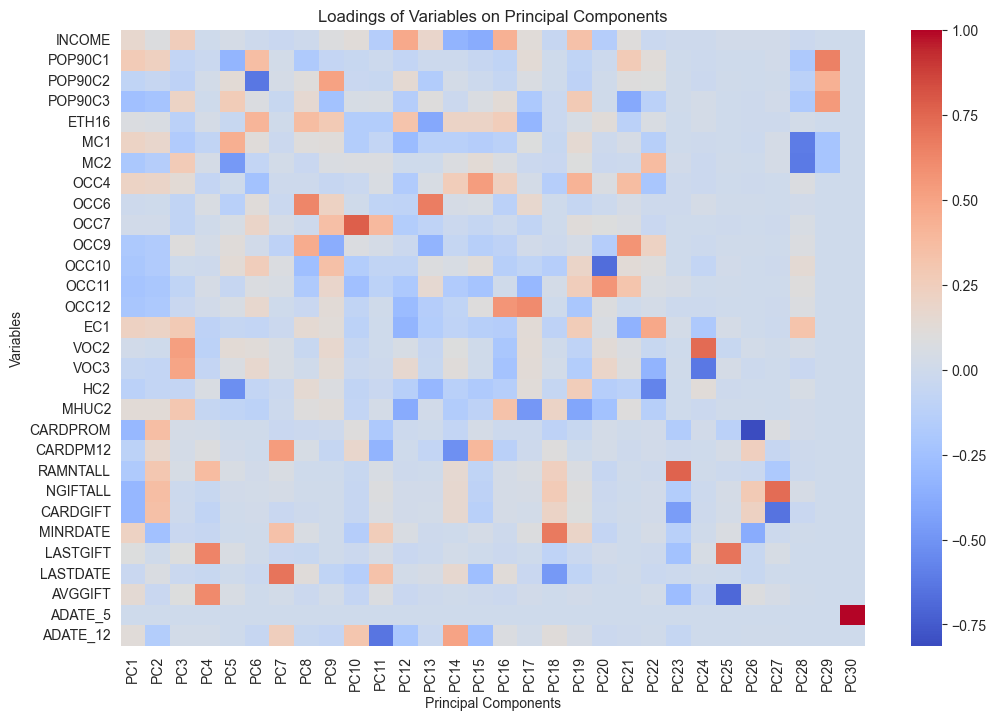

In [376]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(loadings, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Loadings of Variables on Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Variables')
#plt.savefig('loadings.png')
plt.show()

*FA Feature Selection*
Categorical features

In [377]:
def perform_mca(data, cat_feats, components=10):
    # Perform Factor Analysis for categorical variables
    
    data[cat_feats] = data[cat_feats].astype(float)
    mca = prince.MCA(n_components=components, n_iter=5, copy=True, check_input=True, engine='sklearn', random_state=42)
    mca = mca.fit(data[cat_feats])
    
    # Get the factor loadings and explained variance
    mca_df = mca.transform(data[cat_feats])
    explained_variance = mca.eigenvalues_summary

    return mca_df, explained_variance

mca_df, explained_var_mca = perform_mca(df, cat_feats, components=100)

In [378]:
mca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
20,1.172144,0.289519,-0.052707,0.322560,-0.213430,-0.204372,-0.097644,-0.187487,-0.524349,1.085734,...,-0.252509,0.183871,0.035919,-0.252089,-0.246482,-0.057739,0.383442,-0.114183,0.453842,0.202588
30,0.834191,-0.742814,1.438410,0.043295,0.697089,-0.246191,0.279367,1.317615,-0.088724,0.019514,...,0.400466,-0.425308,0.522600,-0.289706,0.398759,-0.022922,-0.357546,-0.200030,0.418594,0.061111
45,1.296410,0.516901,-0.225488,0.530265,-0.327200,-0.152030,-0.037668,-0.292317,-0.213096,0.362916,...,0.131262,-0.016436,-0.180122,-0.136795,-0.080222,-0.146881,0.237301,-0.006802,0.046271,-0.061338
78,-0.337108,-0.151345,-0.247848,-0.009354,0.191834,-0.393893,0.109883,-0.233215,-0.005864,-0.067733,...,0.081980,0.072214,0.002144,-0.082452,-0.144896,0.078924,0.084443,0.147590,-0.228288,-0.038375
93,0.315783,0.062306,-0.548084,-0.900627,0.189588,0.504659,-0.322902,0.260962,0.083413,0.231420,...,-0.247299,0.032817,-0.061823,0.064989,0.033095,0.065377,0.238229,0.119037,0.133019,-0.137967


In [379]:
# cumulative explained variance
explained_var_mca

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.276,0.24%,0.24%
1,0.222,0.19%,0.43%
2,0.205,0.18%,0.61%
3,0.199,0.17%,0.79%
4,0.175,0.15%,0.94%
...,...,...,...
95,0.049,0.04%,7.13%
96,0.049,0.04%,7.17%
97,0.048,0.04%,7.22%


*Significance test feature selection*
Categorical features.

In [380]:
alpha = 0.05
significant = sig_tests(df, cat_feats, 'TARGET_B', alpha)

Chi-squared test for OSOURCE
Chi2 statistic: 584.4030782781556
P-value: 0.008217943329440631
The association between OSOURCE and TARGET_B is significant.


Chi-squared test for TCODE
Chi2 statistic: 49.46793206420607
P-value: 0.014076518271343106
The association between TCODE and TARGET_B is significant.


Chi-squared test for STATE
Chi2 statistic: 79.28310697304653
P-value: 0.00398074295887081
The association between STATE and TARGET_B is significant.


Chi-squared test for ZIP
Chi2 statistic: 5955.88253968254
P-value: 0.15261320591878813
The association between ZIP and TARGET_B is not significant.


Chi-squared test for MAILCODE
Chi2 statistic: 4.525386238261983
P-value: 0.03339553659169869
The association between MAILCODE and TARGET_B is significant.

Fisher's exact test for MAILCODE
Odds ratio: 0.6718007519510337
P-value: 0.0330017582973016
The association between MAILCODE and TARGET_B is significant.


Chi-squared test for RECINHSE
Chi2 statistic: 20.75494473650318
P-value: 5.2196

In [381]:
significant, len(significant)

(['OSOURCE',
  'TCODE',
  'STATE',
  'MAILCODE',
  'RECINHSE',
  'RECP3',
  'CLUSTER',
  'SOLIH',
  'WEALTH2',
  'VETERANS',
  'CRAFTS',
  'WALKER',
  'PEPSTRFL',
  'RFA_2',
  'RFA_3',
  'RFA_4',
  'RFA_5',
  'RFA_6',
  'RFA_7',
  'RFA_8',
  'RFA_9',
  'RFA_10',
  'RFA_11',
  'RFA_12',
  'RFA_13',
  'RFA_14',
  'RFA_16',
  'RFA_17',
  'RFA_18',
  'RFA_19',
  'RFA_21',
  'RFA_22',
  'RFA_24',
  'RFA_2F',
  'RFA_2A',
  'CLUSTER2'],
 36)

*VIF*
Does not work (takes too long)

import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df_ = pd.get_dummies(df[significant])

df_ = add_constant(df)

vif_data = pd.DataFrame()
vif_data["feature"] = df_.columns
vif_data["VIF"] = [variance_inflation_factor(df_.values, i) for i in range(df_.shape[1])]

print(vif_data)

Correlation analysis

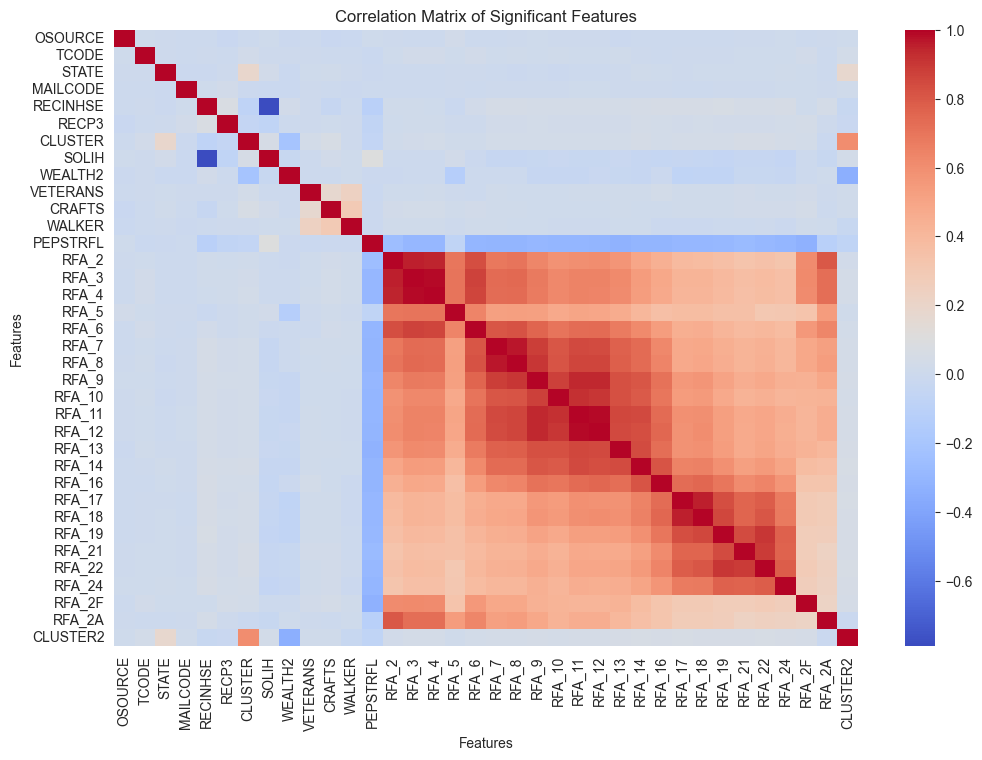

In [389]:
# get correlation of significant features
correlation = df[significant].corr()
# plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Significant Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [392]:
# remove highly correlated features
correlated_features = set()
for i in range(len(correlation.columns)):
    for j in range(i):
        if abs(correlation.iloc[i, j]) > 0.5:
            colname = correlation.columns[i]
            correlated_features.add(colname)

In [393]:
correlated_features

{'CLUSTER2',
 'RFA_10',
 'RFA_11',
 'RFA_12',
 'RFA_13',
 'RFA_14',
 'RFA_16',
 'RFA_17',
 'RFA_18',
 'RFA_19',
 'RFA_21',
 'RFA_22',
 'RFA_24',
 'RFA_2A',
 'RFA_2F',
 'RFA_3',
 'RFA_4',
 'RFA_5',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'SOLIH'}

Checking some correlations between suspected informative features and the target.

In [382]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramer's V for columns A and B
cramers_v_score = cramers_v(df['MAJOR'], df['TARGET_B'])

print("Cramer's V:", cramers_v_score)

Cramer's V: 0.0


### Define the final feature set

In [383]:
df[significant].shape

(9686, 36)

In [384]:
pca.df.iloc[:, :13].shape

(9686, 13)

In [385]:
df_final = pd.concat([df[significant], pca.df.iloc[:, :13]], axis=1)
df_final.shape

(9686, 49)

In [386]:
df_final.head()

,OSOURCE,TCODE,STATE,MAILCODE,RECINHSE,RECP3,CLUSTER,SOLIH,WEALTH2,VETERANS,...,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
20,20.0,2.0,10.0,0.0,0.0,0.0,12.0,99.0,9.0,0.0,...,-1.529187,0.303006,0.284679,-0.301776,0.136280,-0.553442,-0.275752,0.334823,0.044273,0.743960
30,22.0,0.0,14.0,0.0,0.0,0.0,35.0,99.0,8.0,0.0,...,-2.048017,1.351119,0.447595,-3.088057,-0.097251,0.494815,-0.598420,0.962866,-0.492462,-0.031913
45,6.0,0.0,7.0,0.0,0.0,0.0,24.0,99.0,9.0,1.0,...,-1.711354,0.706289,-0.008161,0.781540,-0.363345,-0.465843,0.000913,-0.474297,-0.413045,0.230967
78,54.0,0.0,1.0,0.0,0.0,0.0,13.0,99.0,9.0,0.0,...,-0.667843,-0.734307,-0.918348,-0.578596,0.670639,-0.623169,0.288209,-1.745124,-0.502956,0.315310
93,23.0,1.0,18.0,0.0,0.0,0.0,18.0,99.0,7.0,0.0,...,-0.383050,-0.997313,1.162059,-0.353378,-1.048774,0.443379,0.804063,0.946337,-0.651410,-0.802442


In [395]:
# save dataframe as csv
#df_final.to_csv('data/preprocessed_data.csv', index=True)